# Housing Prices - Advanced Regression Techniques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline
sns.set_style('darkgrid')
sns.set(font_scale=1)

## Data Download

Read the train and test datasets and display the first five rows

In [2]:
train = pd.read_csv('Data/train.csv')
display(train.head())
print('Train dataset has {} rows and {} columns' .format(train.shape[0], train.shape[1]))

test = pd.read_csv('Data/test.csv')
display(test.head())
print('Test dataset has {} rows and {} columns' .format(test.shape[0], test.shape[1]))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Train dataset has 1460 rows and 81 columns


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Test dataset has 1459 rows and 80 columns


The train dataset has 81 features with 1460 observations. The test dataset has 1459 rows and 80 features (no `SalePrice` column in test set). From a quick look, the following features stand out as important when deciding the cost of a house (info about all the columns can be found in data-description.txt) - 

`LotArea` 
`Neighborhood` 
`BldgType`
`HouseStyle`
`OverallQual`
`OverallCond`
`YearBuilt`
`BsmtCond`
`TotalBsmtSF`
`GrLivArea`
`TotRmsAbvGr`
`KitchenQual`
`GarageArea`
`GarageQua`

Most of these columns deal with description about the house - e.g, lot, basement, garage area, quality of the garage, kitchen or basement, what year it was built (the hypothesis being that older homes will be cheaper compared to newer homes). The area in which the house is situated should also be a big indicator of the SalePrice. We will look at these columns (and some more) in our detailed analysis below.

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

The columns in the train df contain a good mixture of categorical and numerical columns. Some columns have missing values. Based on the data description, the missing values could also indicate an absence of the feature in that house (e.g., no basement, no garage, no fireplace, no pool, etc.). Test dataset has more missing values than train dataset. We'll come back to missing values later.

In [4]:
display(train.isnull().sum()[train.isnull().sum().values != 0])
print('*****' * 10)
display(test.isnull().sum()[test.isnull().sum().values != 0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

**************************************************


MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

## Exploratory Data Analysis

### Target Variable

Lets start by looking at our dependent variable - `SalePrice'

In [5]:
display(train['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The average price for a house in the dataset is $\$$180921. Most values fall between $\$$130000 to $\$$214000. The highest cost of a house in this dataset is over $\$$700,000. 

Text(0.5, 1.0, 'Boxplot of the SalePrice Column')

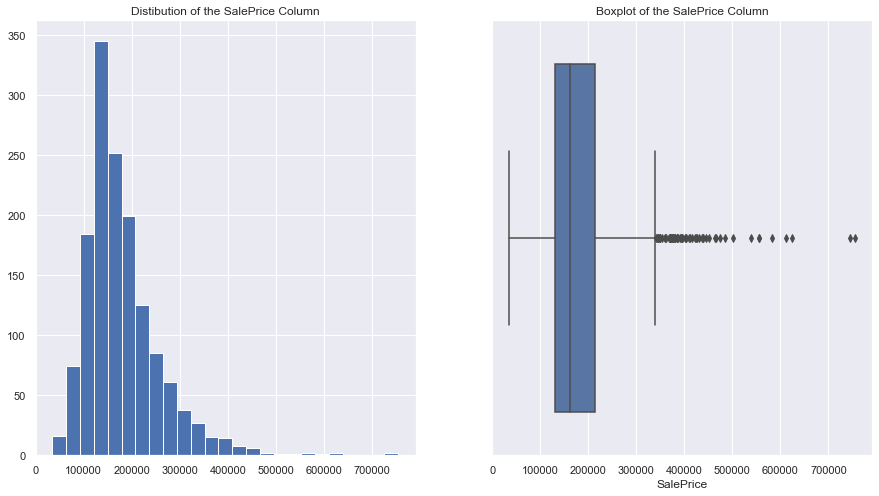

In [6]:
fig = plt.figure(figsize=(15,8))
ax1 = plt.subplot(1,2,1)
ax1.hist(train['SalePrice'], bins=25)
ax1.set_title('Distibution of the SalePrice Column')
ax2 = plt.subplot(1,2,2)
sns.boxplot(train['SalePrice'], ax=ax2)
ax2.set_title('Boxplot of the SalePrice Column')

Observations from the plots - 
1. The target column has a skewed distribution with a long tail to the right(positive skew). The column will have to be transformed before applying an ML model.
2. The boxplot shows that our data has plenty of outliers. Two homes have a sale price value of greater than 700,000. 
3. The skewness of the variable is 1.88. 

In [7]:
train['SalePrice'].skew()

1.8828757597682129

Lets take a quick look at the homes that sold for more than 60K to see if they represent real observations or should be excluded?

In [8]:
train[train['SalePrice'] > 600000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188,Unf,0,142,2330,GasA,Ex,Y,SBrkr,2364,0,0,2364,1,0,2,1,2,1,Ex,11,Typ,2,Gd,Attchd,2009.0,Fin,3,820,TA,TA,Y,0,67,0,0,0,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1995,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387,Unf,0,543,1930,GasA,Ex,Y,SBrkr,1831,1796,0,3627,1,0,3,1,4,1,Gd,10,Typ,1,TA,Attchd,1995.0,Fin,3,807,TA,TA,Y,361,76,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


One thing that strikes me here is that all 4 homes are located in or near the `NorthRidge` neighborhood. Lets check the `SalePrice` of homes in these areas to see if the cost is higher than other places.

In [9]:
northridge_neighbor = train[(train['Neighborhood'] == 'NoRidge')|(train['Neighborhood'] == 'NridgHt')]
northridge_neighbor['SalePrice'].describe()

count       118.000000
mean     322880.898305
std      105631.211198
min      154000.000000
25%      260000.000000
50%      309500.000000
75%      365470.500000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:title={'center':'SalePrice Distribution near NorthRidge Neighborhood'}, ylabel='Frequency'>

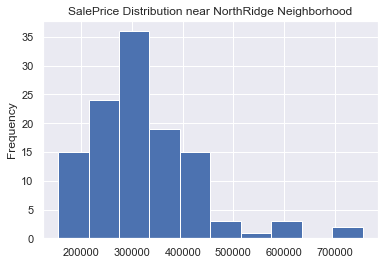

In [10]:
northridge_neighbor['SalePrice'].plot.hist(title = 'SalePrice Distribution near NorthRidge Neighborhood')

The description and the plot show that the SalePrice is indeed higher in this neighborhood compared to the average price combined. This could mean that the high SalePrice homes are real observations. Lets keep them in the dataset for now.

### Numerical Variables

Lets do some exploratory analysis of the numerical variables in the dataframe. 

In [11]:
numerical_cols = train.select_dtypes(['int64', 'float64']).columns
train[numerical_cols].describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Barring columns `Id` and `SalePrice`, there are 36 numerical columns in the dataframe. (Some of these column are probably more categorical in nature - e.g., MSSubClass, OverallQual, OverallCond etc). Only two of those columns (`LotFrontage` and `GarageYrBlt`) have any missing values in the train dataset. Lets check the correlation between the columns as well as the correlation between the columns & the target variable.

In [12]:
corr = train[numerical_cols].corr()
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

In [13]:
#correlation wrt to the target variable
corr['SalePrice'].abs().sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePr

<AxesSubplot:>

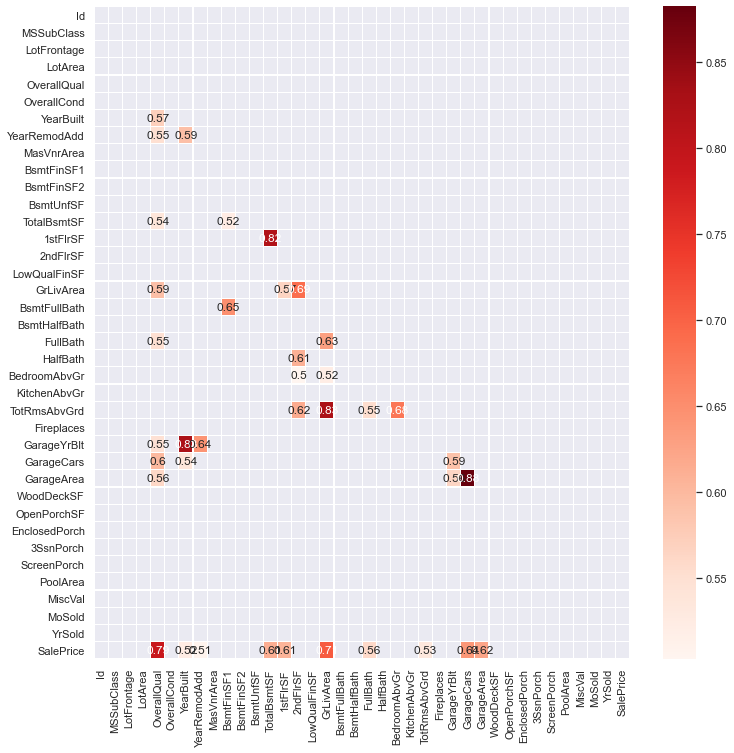

In [14]:
#using a mask to only plot the bottom half of the heatmap with correlation value greater than 0.5 or less than -0.5.

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig = plt.figure(figsize=(12,12))
sns.heatmap(corr[(corr>0.5) | (corr<-0.5)], mask=mask, linewidth=.1, annot=True, cmap="Reds")

We can make the following observations from the correlation values and the heatmap:

- Columns OverallQual, GrLivArea, GarageArea, TotalBsmtSF and TotRmsAbvGrd are strongly related to SalePrice of the house. This agrees with our earlier hypothesis. OverallQual has the strongest correlation to SalePrice.


- Columns `YearBuilt`, `YearRemodAdd`, `1stFloorSF`, `FullBath`, `GarageCars` are also related to the SalePrice.


- Columns such as BsmtFinSF2, BsmtHalfBath, etc. show no relationship to the SalePrice column.


- Certain columns show a strong correlation wrt to each other - for e.g., GarageYrBlt & YearBuilt (corr=0.8, makes sense as construction of a home probably involved the construction of a garage), TotRmsAbvGrd & GrLivArea(0.83, an increase in the number of rooms will increase the area), GarageArea & GarageCars (0.88, a high correlation is expected as an increase in garagearea will allow more cars to fit in), 1stFlrSF & TotalBsmtSF(0.82).
- Since both 1stFloorSF & TotalBsmt SF are related to the SalePrice and eacg other, we will use only one of the column for our modeling purposes. Similarly with GarageCars & GarageArea as well as TotRmsAbvGrd & GrLivArea. We will keep TotalBsmtSF, GarageCars and GrLivArea.

We will use seaborn's pairplot to plot the histograms as well as the scatter plots of the high correlation variables.

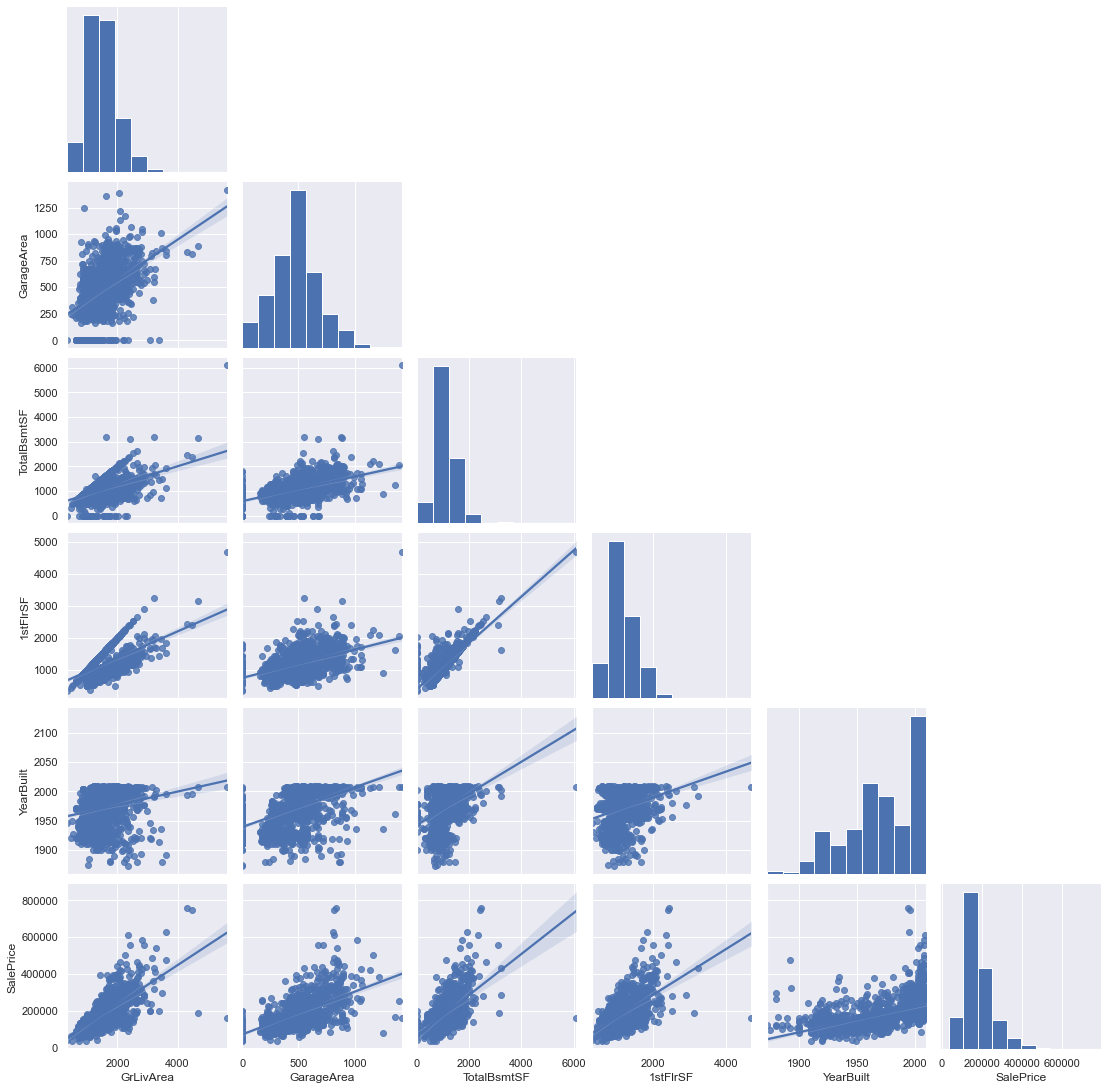

In [15]:
plot_cols = ['GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'SalePrice']

sns.pairplot(train, vars=plot_cols, corner=True, kind='reg')

Lets use countplot to show the count of observations in each catergorical bin. After that, we will plot them against the target variable.

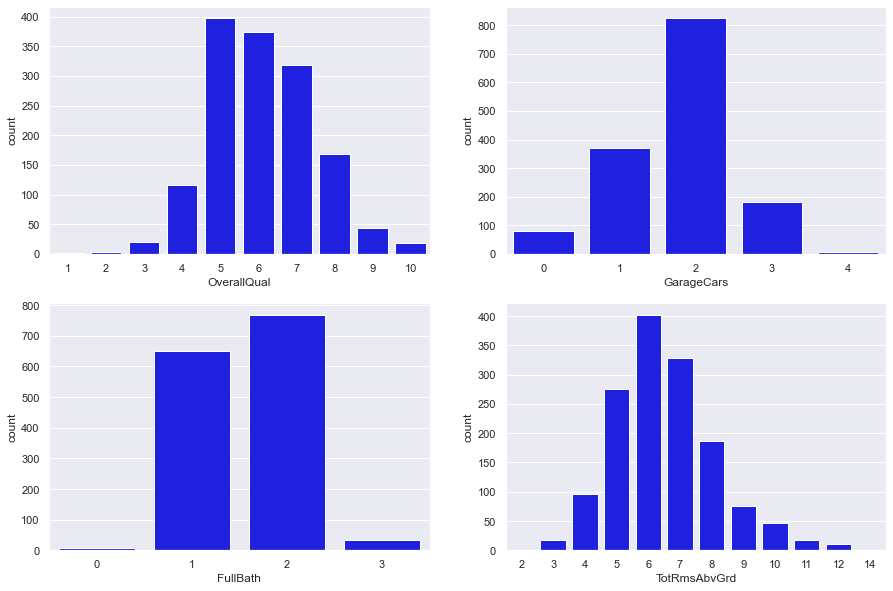

In [78]:
plot_cols = ['OverallQual', 'GarageCars', 'FullBath', 'TotRmsAbvGrd']
fig = plt.figure(figsize = (15,10))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    sns.countplot(train[plot_cols[i]], color='Blue')

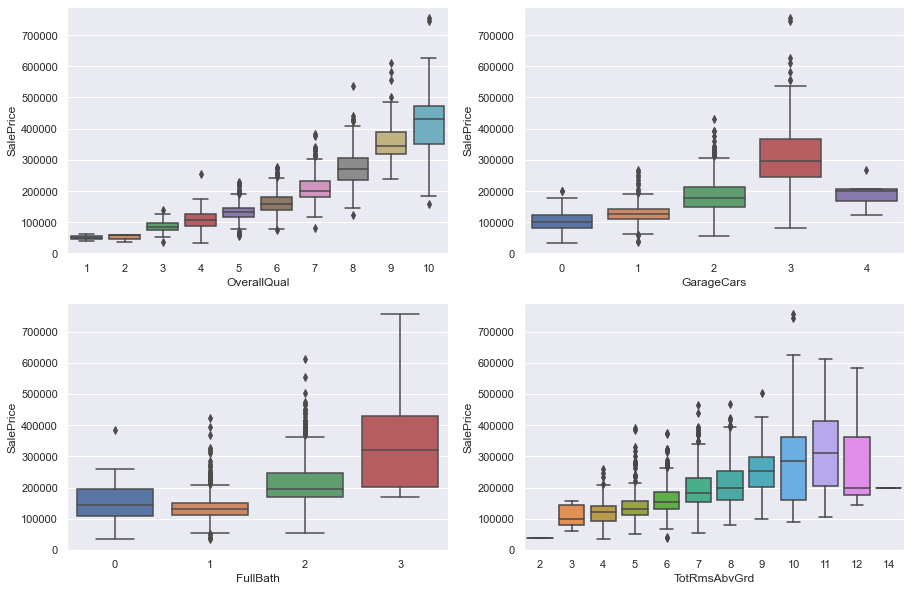

In [82]:
fig = plt.figure(figsize = (15,10))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    sns.boxplot(train[plot_cols[i]], train['SalePrice'])

Observations - 
SalePrice increases linearly as the OverallQual goes from 1 to 10.
SalePrice also increases as the size of a garage goes from 0 to a 3-car but goes down for a 4-car garage.
Similarly, we see an increase in the SalePrice as TotRmsAbvGrd goes from 2 to 11, but the price drops beyond that.
FullBath above ground vs SalePrice is also a linear relationship when the number of bathrooms increase from 1 to 3. Question: Is it possible to have a 0 FullBath house or is it an outlier?

In [83]:
train[train['FullBath'] == 0]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
53,54,20,RL,68.0,50271,Pave,None,IR1,Low,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,9,5,1981,1987,Gable,WdShngl,WdShing,Wd Shng,None,0.0,Gd,TA,CBlock,Ex,TA,Gd,GLQ,1810,Unf,0,32,1842,GasA,Gd,Y,SBrkr,1842,0,0,1842,2,0,0,1,0,1,Gd,5,Typ,1,Gd,Attchd,1981.0,Fin,3,894,TA,TA,Y,857,72,0,0,0,0,None,None,None,0,11,2006,WD,Normal,385000
188,189,90,RL,64.0,7018,Pave,None,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,Duplex,SFoyer,5,5,1979,1979,Gable,CompShg,Plywood,Plywood,Stone,275.0,TA,TA,CBlock,Gd,TA,Av,GLQ,1086,Unf,0,0,1086,GasA,TA,Y,SBrkr,1224,0,0,1224,2,0,0,2,2,2,TA,6,Typ,2,TA,Detchd,1979.0,Unf,2,528,TA,TA,Y,120,0,0,0,0,0,None,None,None,0,6,2009,WD,Alloca,153337
375,376,30,RL,69.0,10020,Pave,None,IR1,Low,AllPub,Inside,Sev,Edwards,Norm,Norm,1Fam,1Story,1,1,1922,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,BrkTil,Fa,Po,Gd,BLQ,350,Unf,0,333,683,GasA,Gd,N,FuseA,904,0,0,904,1,0,0,1,1,1,Fa,4,Maj1,0,None,None,NaN,None,0,0,None,None,Y,0,0,0,0,0,0,None,None,None,0,3,2009,WD,Normal,61000
597,598,120,RL,53.0,3922,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,BrkFace,72.0,Gd,TA,PConc,Ex,TA,Av,Unf,0,Unf,0,1258,1258,GasA,Ex,Y,SBrkr,1402,0,0,1402,0,2,0,2,2,1,Gd,7,Typ,1,Gd,Attchd,2006.0,Fin,3,648,TA,TA,Y,120,16,0,0,0,0,None,None,None,0,2,2007,New,Partial,194201
634,635,90,RL,64.0,6979,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,Duplex,SFoyer,6,5,1980,1980,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,GLQ,1056,Unf,0,0,1056,GasA,Gd,Y,SBrkr,1056,0,0,1056,2,0,0,0,0,2,TA,4,Typ,0,None,Detchd,1980.0,Unf,2,576,TA,TA,Y,264,56,0,0,0,0,None,GdPrv,Shed,600,6,2010,WD,Normal,144000
916,917,20,C (all),50.0,9000,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,3,1949,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,50,Unf,0,430,480,GasA,TA,N,FuseA,480,0,0,480,1,0,0,0,1,1,TA,4,Typ,0,None,Detchd,1958.0,Unf,1,308,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,10,2006,WD,Abnorml,35311
1163,1164,90,RL,60.0,12900,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,Duplex,SFoyer,4,4,1969,1969,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,Av,GLQ,1198,Unf,0,0,1198,GasA,TA,Y,SBrkr,1258,0,0,1258,2,0,0,2,0,2,TA,6,Typ,0,None,CarPort,1969.0,Unf,2,400,Fa,TA,Y,120,0,0,0,0,0,None,None,None,0,1,2008,WD,Alloca,108959
1213,1214,80,RL,69.0,10246,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,Norm,Norm,1Fam,SLvl,4,9,1965,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,Gd,Av,GLQ,648,Unf,0,0,648,GasA,Ex,Y,SBrkr,960,0,0,960,1,1,0,0,0,1,TA,3,Typ,0,None,Attchd,1965.0,Unf,1,364,TA,TA,Y,88,0,0,0,0,0,None,None,None,0,5,2006,WD,Normal,145000
1270,1271,40,RL,69.0,23595,Pave,None,Reg,Low,AllPub,Inside,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,6,1979,1979,Shed,WdShake,Plywood,Plywood,None,0.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,1258,Unf,0,74,1332,GasA,TA,Y,SBrkr,1332,192,0,1524,2,0,0,1,0,1,Gd,4,Typ,1,TA,Attchd,1979.0,Fin,2,586,TA,TA,Y,268,0,0,0,0,0,None,None,None,0,4,2010,WD,Normal,260000


### Categorical Columns

Lets take a look at some of the categorical columns.

In [18]:
categorical_cols = train.select_dtypes(include='object').columns
train[categorical_cols].tail()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1459,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,Gd,TA,CBlock,TA,TA,No,BLQ,LwQ,GasA,Gd,Y,SBrkr,TA,Typ,NaN,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal


As we can see below, 16 out of 43 of the categorical columns have missing values. Based on the description of the data, these are not really "missing values" but an absence of the feature in the particular house. For e.g., a NaN value in `Alley` means no alley access. Lets first change the NaN in those columns to None. 

In [19]:
train[categorical_cols].isnull().sum()[train[categorical_cols].isnull().sum() > 0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

#### Removing invalid NaN values in categorical variables

Except `Electrical`, missing value in all the other columns above can be replaced by None.

In [20]:
fix_nan_cat_cols = train[categorical_cols].isnull().sum()[train[categorical_cols].isnull().sum() > 0].index
fix_nan_cat_cols = fix_nan_cat_cols.drop('Electrical')
fix_nan_cat_cols

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [21]:
#fill both the train and test datasets
train[fix_nan_cat_cols] = train[fix_nan_cat_cols].applymap(lambda x: 'None' if x is np.nan else x)
test[fix_nan_cat_cols] = test[fix_nan_cat_cols].applymap(lambda x: 'None' if x is np.nan else x)

In [22]:
#test if it worked
train[categorical_cols].isnull().sum()[train[categorical_cols].isnull().sum() > 0]

Electrical    1
dtype: int64

Lets do a count plot and boxplot wrt to SalePrice for some of the categorical columns. We will group these columns based on whether they define an external or internal property of the house or based on outside conditions (neighborhood etc.) as much as possible.

In [23]:
categorical_cols
#Outside - 'MSZoning', 'Street', 'Alley', 'Neighborhood', 'Condition1', 'Condition2','MiscFeature'

#Inside - 'Utilities','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Heating', 'HeatingQC', 
#         'CentralAir', 'Electrical', 'KitchenQual','FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual','GarageCond', 

#HouseType - 'LotShape', 'LandContour', 'LotConfig', 'LandSlope','BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
#          'Exterior1st','Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation','PavedDrive','PoolQC','Fence'

#Sale: 'Functional','SaleType', 'SaleCondition'

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

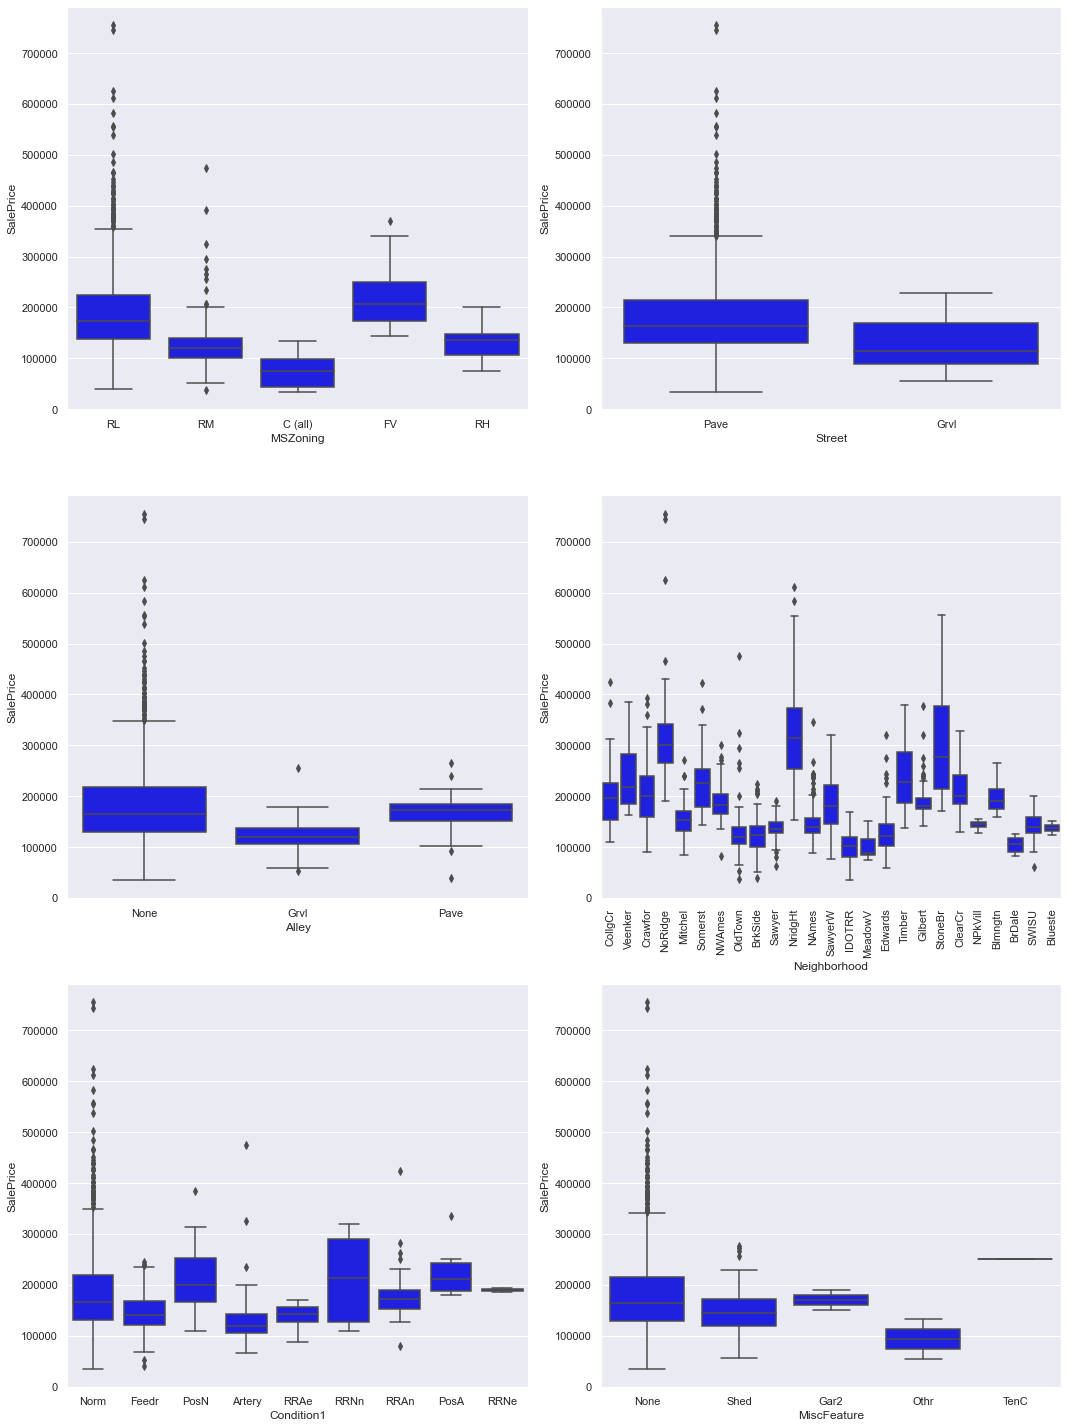

In [24]:
plot_cols = ['MSZoning', 'Street', 'Alley', 'Neighborhood', 'Condition1','MiscFeature']
fig = plt.figure(figsize=(15,20))
for i in range(6):
    ax = plt.subplot(3,2,i+1)
    sns.boxplot(train[plot_cols[i]], train['SalePrice'], color='Blue')
    if plot_cols[i] == 'Neighborhood':
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()

Observations based on the plots for categorical column -

We see a strong relationship between MSZoning and SalePrice. Commercial zones have the lowest median price while the Floating Village Residential (FV) have the highest median price.

Paved Street (road access to the property) shows a higher SalePrice than the gravel Street but the number of gravel street houses in this dataset are very low (6 Grvl compared to 1454 Pave). So we won't take this feature into account going forward. Same goes for Alley.

There are some neighborhoods (as we discussed before) that have more expensive homes (e.g., NRidgeHts, NoRidge. StoneBr) compared to the rest. Location/neighborhood of the house also seems to have an effect on the SalePrice with some neighborhoods selling on an average higher than the others.

The rest of the variables does not show any strong relation to the SalePrice.

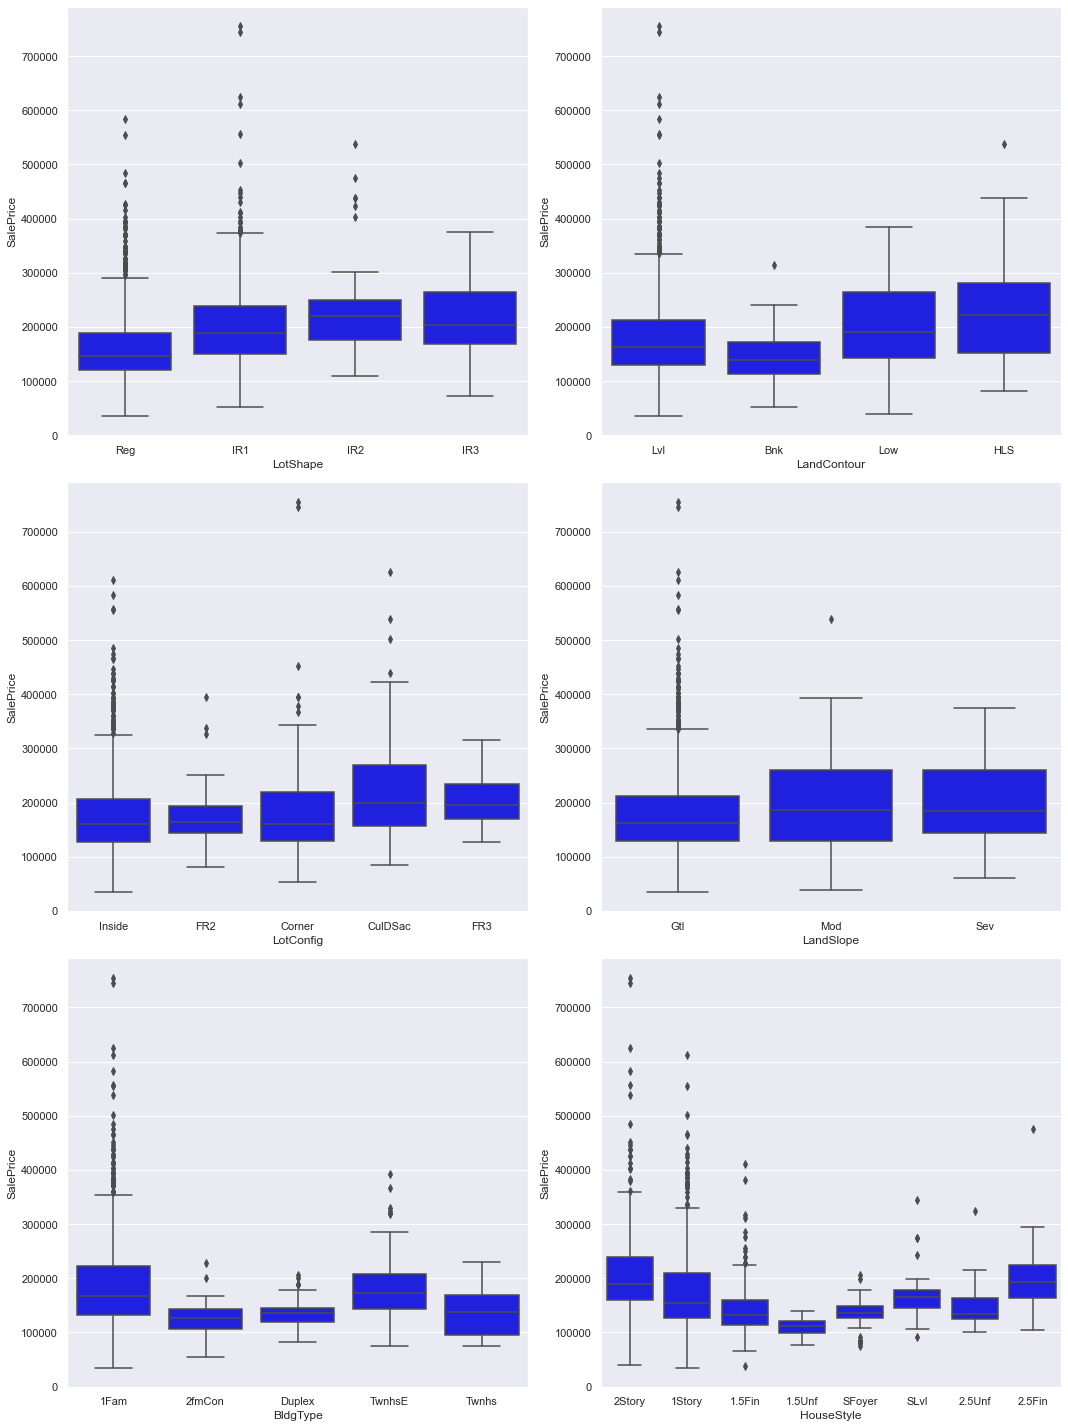

In [25]:
plot_cols = ['LotShape', 'LandContour', 'LotConfig', 'LandSlope','BldgType', 'HouseStyle']
fig = plt.figure(figsize=(15,20))
for i in range(6):
    ax = plt.subplot(3,2,i+1)
    sns.boxplot(train[plot_cols[i]], train['SalePrice'], color='Blue')
plt.tight_layout()

Observations: 

There is definitely difference in SalePrice between Reg & IR1 values, but not so much between IR1, IR2 & IR3. 

CulDSac & FR3 (Frontage on 3 sides of property) have higher median values than the rest of the LotConfig values but the difference is not appreciable.

None of the features above show any strong relation to the Sale Price.

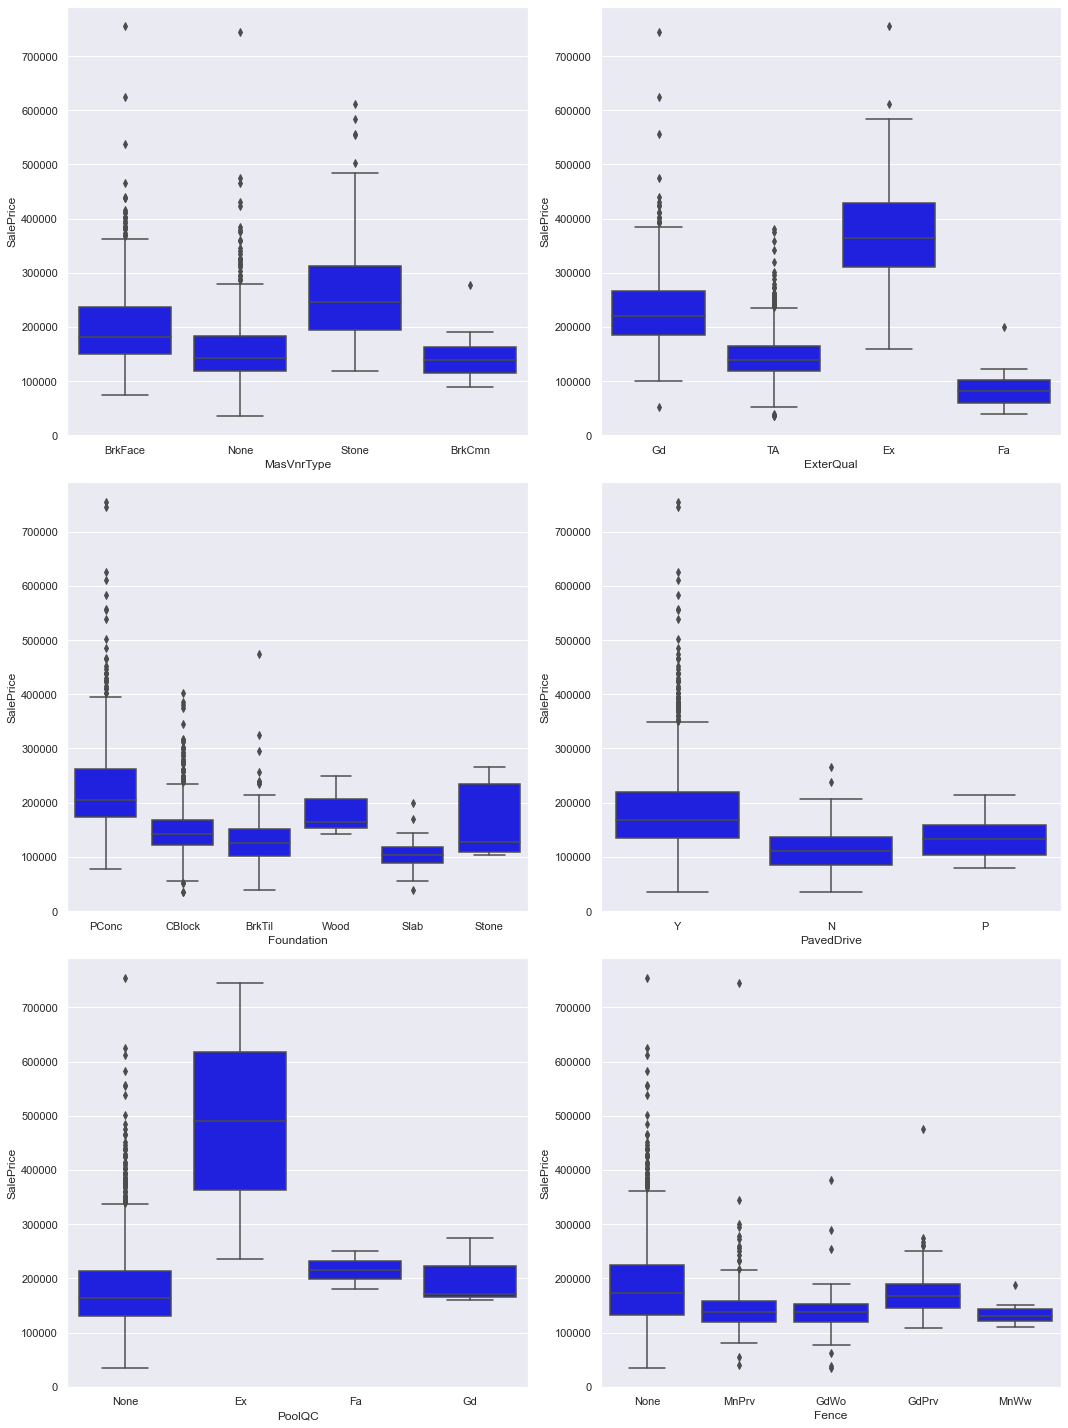

In [26]:
plot_cols = ['MasVnrType', 'ExterQual', 'Foundation','PavedDrive','PoolQC','Fence']
fig = plt.figure(figsize=(15,20))
for i in range(6):
    ax = plt.subplot(3,2,i+1)
    sns.boxplot(train[plot_cols[i]], train['SalePrice'], color='Blue')
plt.tight_layout()

Observations -

There is also a strong relation between the ExterQual & SalePrice with the median price going up as the condition goes from Fa(Fair) to Ex(Excellent).

There is a big difference in SalePrice between Excellent PoolQC and others. But the number of homes with pool are few and far between in this dataset(7 with pool to 1453 without a pool). We will ignore this feature

No other strong relationship observed in the plots above.

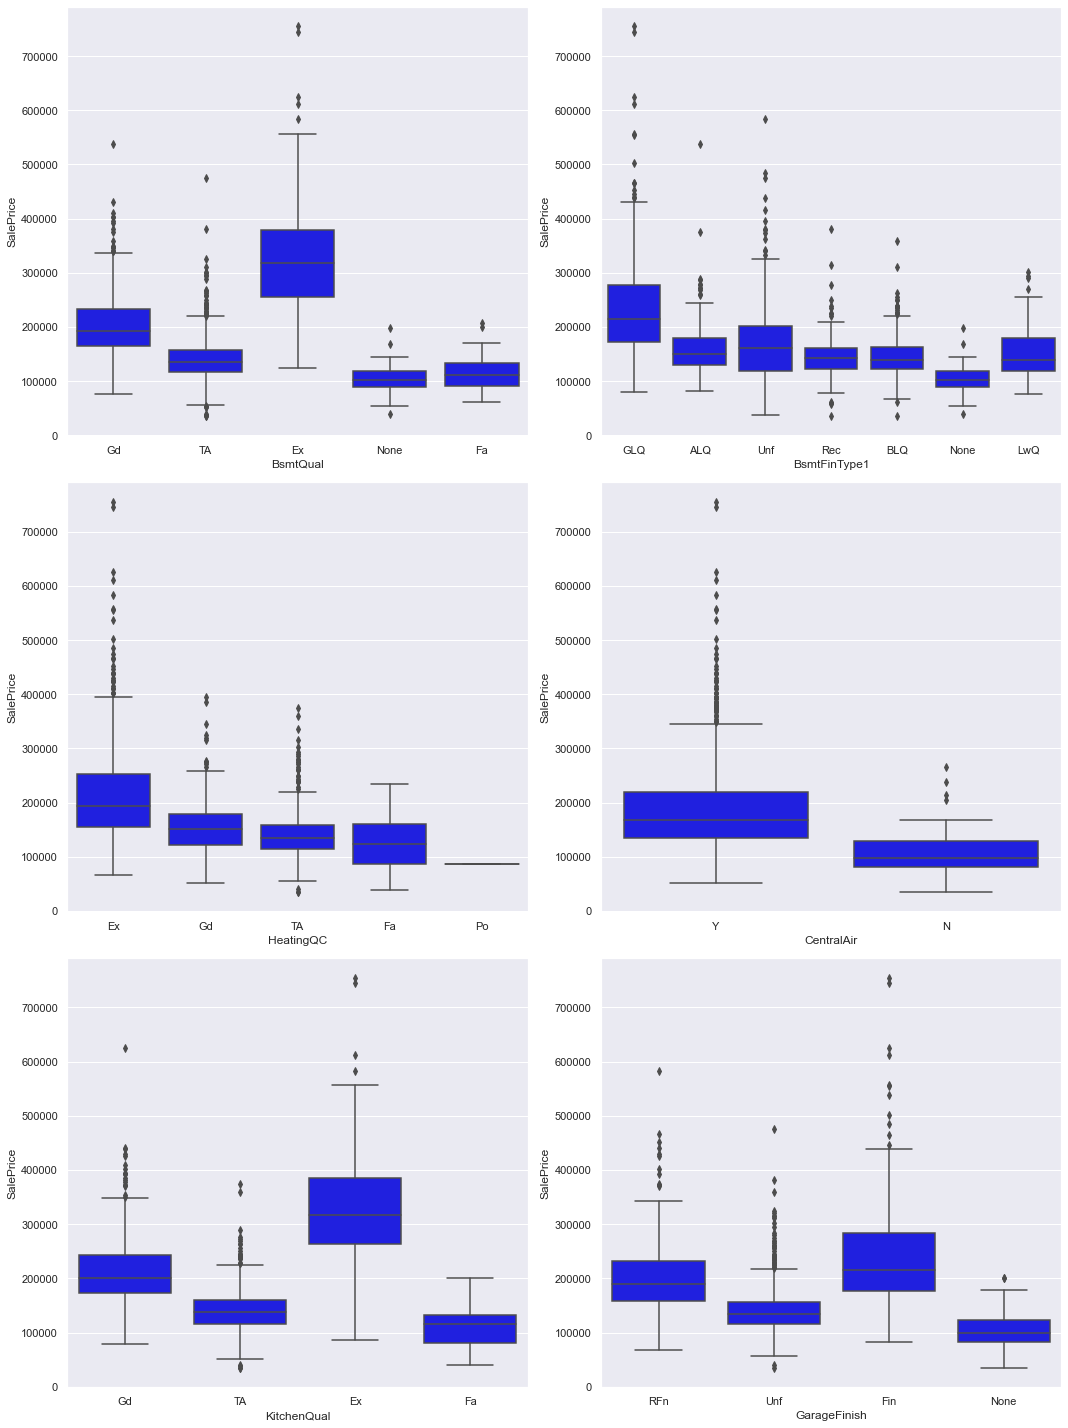

In [27]:
plot_cols = ['BsmtQual', 'BsmtFinType1', 'HeatingQC', 'CentralAir', 'KitchenQual','GarageFinish']
fig = plt.figure(figsize=(15,20))
for i in range(6):
    ax = plt.subplot(3,2,i+1)
    sns.boxplot(train[plot_cols[i]], train['SalePrice'], color='Blue')
plt.tight_layout()

Observations:

A strong relationship can easily be observed for KitchenQual vs SalePrice. The price goes up as the quality of the kitchen goes from Fair to Excellent with around a ~10K increase in median price values from Good to Excellent.

BsmtQual, GarageFinish and HeatingQC also show an increase in SalePrice with higher quality. 

Homes with no central heat show lower SalePrice values compared to the ones with central heat.

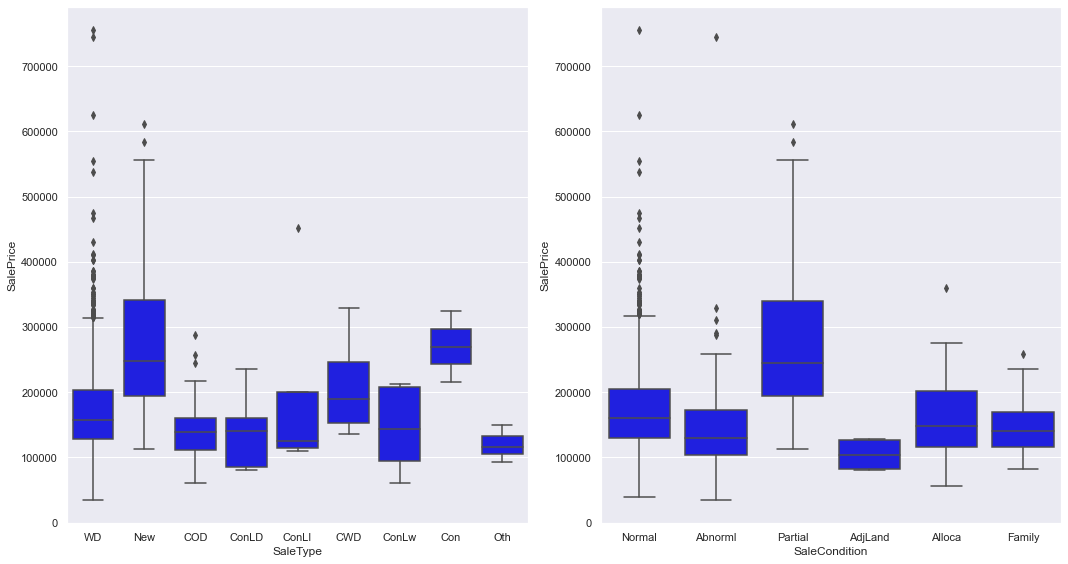

In [28]:
plot_cols = ['SaleType', 'SaleCondition']
fig = plt.figure(figsize=(15,8))
for i in range(2):
    ax = plt.subplot(1,2,i+1)
    sns.boxplot(train[plot_cols[i]], train['SalePrice'], color='Blue')
plt.tight_layout()

No observable relationship between SaleCondition & SaleType wrt to SalePrice

### Missing Values

Lets take a look at the missing values in both train & test datasets

In [29]:
print('Train Dataset Missing Values')
display(train.isnull().sum()[train.isnull().sum() != 0])
print('*' *50)
print('Test Dataset Missing Values')
display(test.isnull().sum()[test.isnull().sum() != 0])

Train Dataset Missing Values


LotFrontage    259
MasVnrArea       8
Electrical       1
GarageYrBlt     81
dtype: int64

**************************************************
Test Dataset Missing Values


MSZoning          4
LotFrontage     227
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
GarageYrBlt      78
GarageCars        1
GarageArea        1
SaleType          1
dtype: int64

LotFrontage gives the linear feet of street connected to the property - We are most probably not going to use this feature as it does not show any strong correlation to SalePrice. But for the meantime can be replaced by the median of column.


MasVnrArea is the masonry veneer area in sqare feet. Further analysis shows that all the NaN values correpond to None in MasVnrType. So we can replace the NaN values with 0 (which is also the median of the column)


Electrical - type of electrical system (SBrkr, FuseA, FuseF, FuseP, Mix) - replace with mode of the column (SBrkr)


GarageYrBlt - the year garage was built. 75% of the values are the same as the YrBuilt for the house indicating that the garage was built at the same time as the house (which explains the high correlation between the two variables). Interestingly, majority of the homes with a different GarageYrBlt are older homes (built before 1980). The same is true for homes with missing GarageYear values. We could fill the missing values with the median of the column (1980 in this case) for homes built before 1980 and with the YearBuilt values for the rest. Regardless, this variable will probably not be used as  - 1) it does not show a high correlation to SalePrice and, 2) it is highly correlated to YearBuilt which can be used for modeling instead of GarageYrBlt.

Update as of 09/01/20: GarageYrBlt is NaN only for those houses that don't have a garage. So we can replace the NaN with 0 here.

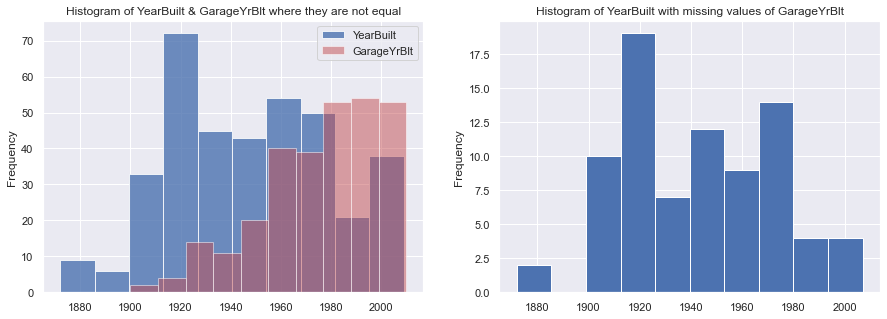

In [30]:
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot(1,2,1)
train[train['GarageYrBlt'] != train['YearBuilt']]['YearBuilt'].plot.hist(ax=ax1, alpha=0.8, legend = True)
train[train['GarageYrBlt'] != train['YearBuilt']]['GarageYrBlt'].plot.hist(ax=ax1, color='r', alpha=0.5, legend = True)
ax1.set_title('Histogram of YearBuilt & GarageYrBlt where they are not equal')
ax2 = plt.subplot(1,2,2)
train[train['GarageYrBlt'].isna()]['YearBuilt'].plot.hist(ax=ax2)
ax2.set_title('Histogram of YearBuilt with missing values of GarageYrBlt')
plt.show()

In [131]:
train[train['GarageYrBlt'].isna()][['GarageYrBlt', 'GarageArea', 'GarageCars']]

,GarageYrBlt,GarageArea,GarageCars


In [129]:
#fill missing values

train['LotFrontage'].fillna(train['LotFrontage'].median(), inplace=True)
train['MasVnrArea'].fillna(0, inplace=True)
train['Electrical'].fillna(train['Electrical'].mode()[0], inplace=True)
train['GarageYrBlt'].fillna(0, inplace=True)

In [130]:
#check for missing values to see the above code worked
train.isnull().sum()[train.isnull().sum()>0]

Series([], dtype: int64)

In [48]:
#check to see if we have any duplicate rows in the dataset - we don't
train.duplicated().value_counts()

False    1460
dtype: int64

### Outliers

In this section, I am going to check if we need to remove any outliers from our dataset before proceeding to the next section. Lets look at the numerical columns we are interested in to see if there are any outliers that may be deleted from the data.

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

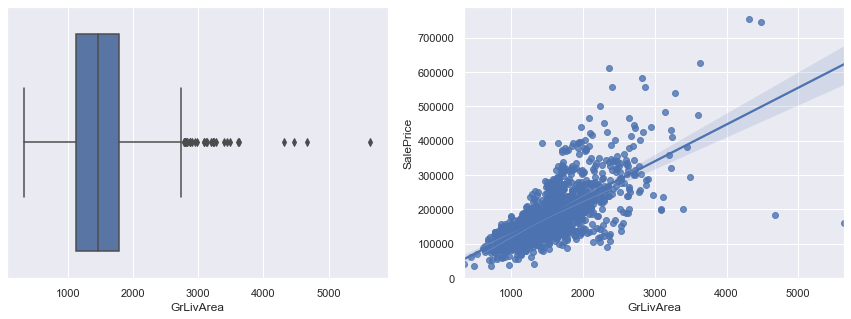

In [86]:
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(1,2,1)
sns.boxplot(train['GrLivArea'])
ax = plt.subplot(1,2,2)
sns.regplot(train['GrLivArea'], train['SalePrice'])

There are 2 points in the regplot that have a high GrLivArea but low SalePrice. Lets delete those points

In [96]:
train = train.drop(index=train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 200000)].index)

In [97]:
#check to see if the above worked
train.shape

(1458, 81)

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

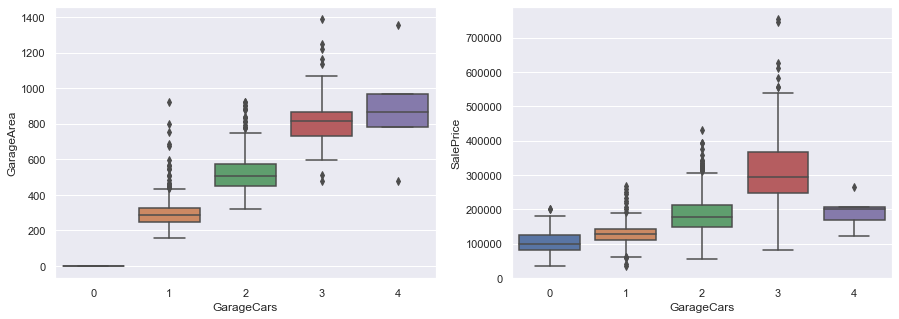

In [107]:
cols_to_check_outliers = ['OverallQual','TotalBsmtSF']

fig = plt.figure(figsize=(15,5))
ax = plt.subplot(1,2,1)
sns.boxplot(train['GarageCars'], train['GarageArea'])
ax = plt.subplot(1,2,2)
sns.boxplot(train['GarageCars'], train['SalePrice'])

Data with GarageCars = 4 and GarageArea less than 600 is probably an outlier. Lets remove this

In [109]:
train = train.drop(index=train[(train['GarageCars'] == 4) & (train['GarageArea'] < 600)].index)

In [110]:
#check
train.shape

(1457, 81)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Feedr,Norm,2fmCon,2.5Fin,6,7,1914,1995,Hip,CompShg,VinylSd,VinylSd,None,0.0,Fa,TA,CBlock,TA,Fa,No,LwQ,256,Unf,0,1184,1440,GasA,Ex,Y,FuseA,1440,1440,515,3395,0,0,2,0,8,2,Fa,14,Typ,0,None,None,NaN,None,0,0,None,None,N,0,110,0,0,0,0,None,None,None,0,3,2007,WD,Abnorml,200000


<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

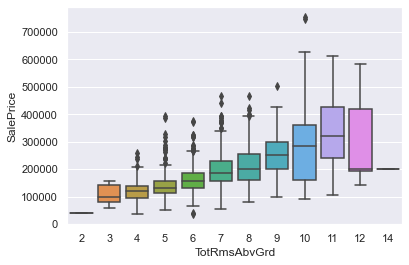

In [119]:
display(train[train['TotRmsAbvGrd'] == 14])
sns.boxplot(train['TotRmsAbvGrd'], train['SalePrice'])

Only 1 datapoint with 14 TotRmsAbvGrd. Lets remove it.

In [121]:
train = train.drop(index=train[train['TotRmsAbvGrd'] == 14].index)

In [123]:
#check
train.shape

(1456, 81)

This concludes our EDA & Data Wrangling. 


Next step is Feature Engineering & Feature Selection.